In [1095]:
import pandas as pd
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz  
from sklearn.svm import SVR
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ClassificationReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
from matplotlib import pyplot
from sklearn import tree
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore','FutureWarning')

In [1034]:
# read  data
survey = pd.read_csv('Data/survey.csv')
indicators = pd.read_csv('Data/raw_data/Development_Indicators.csv')

# Data Cleaning and Pre-Processing

In [1035]:
# select the required field from clean the indicators dataset
indicator_filter = indicators[(indicators['Series Name'] == "Coverage of social insurance programs (% of population)")|(indicators['Series Name'] == "Coverage of social protection and labor programs (% of population)")|(indicators['Series Name'] == "Coverage of unemployment benefits and ALMP (% of population)")|(indicators['Series Name'] == "Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)")|(indicators['Series Name'] == "Employment to population ratio, 15+, female (%) (national estimate)")|(indicators['Series Name'] == "Employment to population ratio, 15+, male (%) (national estimate)")|(indicators['Series Name'] == "GDP per capita (current US$)")|(indicators['Series Name'] == "Labor force participation rate, female (% of female population ages 15+) (national estimate)")|(indicators['Series Name'] == "Labor force participation rate, male (% of male population ages 15+) (national estimate)")|(indicators['Series Name'] == "Labor force participation rate, total (% of total population ages 15+) (national estimate)")|(indicators['Series Name'] == "Labor force with basic education (% of total working-age population with basic education)")|(indicators['Series Name'] == "Labor force with basic education, female (% of female working-age population with basic education)")|(indicators['Series Name'] == "Life expectancy at birth, female (years)")|(indicators['Series Name'] == "Life expectancy at birth, total (years)")|(indicators['Series Name'] == "Population, total")|(indicators['Series Name'] == "Suicide mortality rate (per 100,000 population)")|(indicators['Series Name'] == "Suicide mortality rate, female (per 100,000 female population)")|(indicators['Series Name'] == "Suicide mortality rate, male (per 100,000 male population)")|(indicators['Series Name'] == "Unemployment with basic education (% of total labor force with basic education)")|(indicators['Series Name'] == "Unemployment with basic education, female (% of female labor force with basic education)")|(indicators['Series Name'] == "Unemployment with basic education, male (% of male labor force with basic education)")]
# rename year column
rename_df=indicator_filter.rename(columns = {"1960 [YR1960]":"1960","1961 [YR1961]":"1961","1962 [YR1962]":"1962","1963 [YR1963]":"1963","1964 [YR1964]":"1964","1965 [YR1965]":"1965","1966 [YR1966]":"1966","1967 [YR1967]":"1967","1968 [YR1968]":"1968","1969 [YR1969]":"1969","1970 [YR1970]":"1970",
                                             "1971 [YR1971]":"1971","1972 [YR1972]":"1972","1973 [YR1973]":"1973","1974 [YR1974]":"1974","1975 [YR1975]":"1975","1976 [YR1976]":"1976","1977 [YR1977]":"1977","1978 [YR1978]":"1978","1979 [YR1979]":"1979","1980 [YR1980]":"1980","1981 [YR1981]":"1981",
                                             "1982 [YR1982]":"1982","1983 [YR1983]":"1983","1984 [YR1984]":"1984","1985 [YR1985]":"1985","1986 [YR1986]":"1986","1987 [YR1987]":"1987","1988 [YR1988]":"1988","1989 [YR1989]":"1989","1990 [YR1990]":"1990","1991 [YR1991]":"1991","1992 [YR1992]":"1992",
                                             "1993 [YR1993]":"1993","1994 [YR1994]":"1994","1995 [YR1995]":"1995","1996 [YR1996]":"1996","1997 [YR1997]":"1997","1998 [YR1998]":"1998","1999 [YR1999]":"1999","2000 [YR2000]":"2000","2001 [YR2001]":"2001","2002 [YR2002]":"2002","2003 [YR2003]":"2003",
                                             "2004 [YR2004]":"2004","2005 [YR2005]":"2005","2006 [YR2006]":"2006","2007 [YR2007]":"2007","2008 [YR2008]":"2008","2009 [YR2009]":"2009","2010 [YR2010]":"2010","2011 [YR2011]":"2011","2012 [YR2012]":"2012","2013 [YR2013]":"2013","2014 [YR2014]":"2014",
                                             "2015 [YR2015]":"2015","2016 [YR2016]":"2016","2017 [YR2017]":"2017","2018 [YR2018]":"2018","2019 [YR2019]":"2019","2020 [YR2020]":"2020",}) 

rename_df.head()

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
8,Afghanistan,AFG,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,Coverage of social protection and labor progra...,per_allsp.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,8.820582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,AFG,Coverage of unemployment benefits and ALMP (% ...,per_lm_alllm.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Afghanistan,AFG,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.481100,NaN,23.177000,NaN,NaN,18.201599,NaN,NaN,NaN
15,Afghanistan,AFG,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.998901,NaN,71.530197,NaN,NaN,65.576797,NaN,NaN,NaN


In [1036]:
# Drop column we don't need 
dropeddata=rename_df.drop("Series Code",axis=1)
transposed = dropeddata.pivot_table(index=['Country Name','Country Code'], columns=['Series Name'], aggfunc='first', fill_value=0)
reset_1960=transposed["1960"].reset_index()
reset_1961=transposed["1961"].reset_index()
reset_1962=transposed["1962"].reset_index()
reset_1963=transposed["1963"].reset_index()
reset_1964=transposed["1964"].reset_index()
reset_1965=transposed["1965"].reset_index()
reset_1966=transposed["1966"].reset_index()
reset_1967=transposed["1967"].reset_index()
reset_1968=transposed["1968"].reset_index()
reset_1969=transposed["1969"].reset_index()
reset_1970=transposed["1970"].reset_index()
reset_1971=transposed["1971"].reset_index()
reset_1972=transposed["1972"].reset_index()
reset_1973=transposed["1973"].reset_index()
reset_1974=transposed["1974"].reset_index()
reset_1975=transposed["1975"].reset_index()
reset_1976=transposed["1976"].reset_index()
reset_1977=transposed["1977"].reset_index()
reset_1978=transposed["1978"].reset_index()
reset_1979=transposed["1979"].reset_index()
reset_1980=transposed["1980"].reset_index()
reset_1981=transposed["1981"].reset_index()
reset_1982=transposed["1982"].reset_index()
reset_1983=transposed["1983"].reset_index()
reset_1984=transposed["1984"].reset_index()
reset_1985=transposed["1985"].reset_index()
reset_1986=transposed["1986"].reset_index()
reset_1987=transposed["1987"].reset_index()
reset_1988=transposed["1988"].reset_index()
reset_1989=transposed["1989"].reset_index()
reset_1990=transposed["1990"].reset_index()
reset_1991=transposed["1991"].reset_index()
reset_1992=transposed["1992"].reset_index()
reset_1993=transposed["1993"].reset_index()
reset_1994=transposed["1994"].reset_index()
reset_1995=transposed["1995"].reset_index()
reset_1996=transposed["1996"].reset_index()
reset_1997=transposed["1997"].reset_index()
reset_1998=transposed["1998"].reset_index()
reset_1999=transposed["1999"].reset_index()
reset_2000=transposed["2000"].reset_index()
reset_2001=transposed["2001"].reset_index()
reset_2002=transposed["2002"].reset_index()
reset_2003=transposed["2003"].reset_index()
reset_2004=transposed["2004"].reset_index()
reset_2005=transposed["2005"].reset_index()
reset_2006=transposed["2006"].reset_index()
reset_2007=transposed["2007"].reset_index()
reset_2008=transposed["2008"].reset_index()
reset_2009=transposed["2009"].reset_index()
reset_2010=transposed["2010"].reset_index()
reset_2011=transposed["2011"].reset_index()
reset_2012=transposed["2012"].reset_index()
reset_2013=transposed["2013"].reset_index()
reset_2014=transposed["2014"].reset_index()
reset_2015=transposed["2015"].reset_index()
reset_2016=transposed["2016"].reset_index()
reset_2017=transposed["2017"].reset_index()
reset_2018=transposed["2018"].reset_index()
reset_2019=transposed["2019"].reset_index()
reset_2020=transposed["2020"].reset_index()
reset_1960['Year']=1960
reset_1961['Year']=1961
reset_1962['Year']=1962
reset_1963['Year']=1963
reset_1964['Year']=1964
reset_1965['Year']=1965
reset_1966['Year']=1966
reset_1967['Year']=1967
reset_1968['Year']=1968
reset_1969['Year']=1969
reset_1970['Year']=1970
reset_1971['Year']=1971
reset_1972['Year']=1972
reset_1973['Year']=1973
reset_1974['Year']=1974
reset_1975['Year']=1975
reset_1976['Year']=1976
reset_1977['Year']=1977
reset_1978['Year']=1978
reset_1979['Year']=1979
reset_1980['Year']=1980
reset_1981['Year']=1981
reset_1982['Year']=1982
reset_1983['Year']=1983
reset_1984['Year']=1984
reset_1985['Year']=1985
reset_1986['Year']=1986
reset_1987['Year']=1987
reset_1988['Year']=1988
reset_1989['Year']=1989
reset_1990['Year']=1990
reset_1991['Year']=1991
reset_1992['Year']=1992
reset_1993['Year']=1993
reset_1994['Year']=1994
reset_1995['Year']=1995
reset_1996['Year']=1996
reset_1997['Year']=1997
reset_1998['Year']=1998
reset_1999['Year']=1999
reset_2000['Year']=2000
reset_2001['Year']=2001
reset_2002['Year']=2002
reset_2003['Year']=2003
reset_2004['Year']=2004
reset_2005['Year']=2005
reset_2006['Year']=2006
reset_2007['Year']=2007
reset_2008['Year']=2008
reset_2009['Year']=2009
reset_2010['Year']=2010
reset_2011['Year']=2011
reset_2012['Year']=2012
reset_2013['Year']=2013
reset_2014['Year']=2014
reset_2015['Year']=2015
reset_2016['Year']=2016
reset_2017['Year']=2017
reset_2018['Year']=2018
reset_2019['Year']=2019
reset_2020['Year']=2020

all_year = [reset_1960,reset_1961,reset_1962,reset_1963,reset_1964,reset_1965,reset_1966,reset_1967,reset_1968,reset_1969,reset_1970,reset_1971,reset_1972,reset_1973,reset_1974,reset_1975,reset_1976,reset_1977,reset_1978,reset_1979,reset_1980,reset_1981,reset_1982,reset_1983,reset_1984,reset_1985,reset_1986,reset_1987,reset_1988,reset_1989,reset_1990,reset_1991,reset_1992,reset_1993,reset_1994,reset_1995,reset_1996,reset_1997,reset_1998,reset_1999,reset_2000,reset_2001,reset_2002,reset_2003,reset_2004,reset_2005,reset_2006,reset_2007,reset_2008,	reset_2009,reset_2010,	reset_2011,reset_2012,reset_2013,reset_2014,reset_2015,reset_2016,	reset_2017,reset_2018,reset_2019,reset_2020]

concate_data= pd.concat(all_year)

all_year_data =concate_data.replace(0, np.nan)


# Rename column
indicator_cleandata=all_year_data.rename(columns={"Coverage of social insurance programs (% of population)": "social_insurance",
                              "Series Name":"Series_name",
                              "Country Name":"Country",                  
                              "Country Code":"country_code",
                              "Coverage of social protection and labor programs (% of population)": "social_protection",
                              "Coverage of unemployment benefits and ALMP (% of population)":"unemployment_benefits",
                              "Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)": "Educational_attainment",
                              "Employment to population ratio, 15+, female (%) (national estimate)":"Female_employment",
                              "Employment to population ratio, 15+, male (%) (national estimate)": "Male_employment",
                              "GDP per capita (current US$)": "GDP_per_capita",
                              "Labor force participation rate, female (% of female population ages 15+) (national estimate)": "Labor_force_rate_female",
                              "Labor force participation rate, male (% of male population ages 15+) (national estimate)": "Labor_force_rate_male",
                              "Labor force participation rate, total (% of total population ages 15+) (national estimate)": "Labor_force_total",
                              "Labor force with basic education (% of total working-age population with basic education)":"Labour_force_with_basic_education",
                              "Labor force with basic education, female (% of female working-age population with basic education)":"Labour_force_with_basic_education_female",
                              "Life expectancy at birth, female (years)":"life_expectancy_female","Life expectancy at birth, male (years)": "Life_expectancy_male",
                              "Life expectancy at birth, total (years)":"Life_expectancy_total","Population, total":"Total_population",
                              "Suicide mortality rate (per 100,000 population)":"Suicide_mortality_rate_per_100k",
                              "Suicide mortality rate, female (per 100,000 female population)":"Suicide_mortality_rate_per_100k_female",
                              "Suicide mortality rate, male (per 100,000 male population)":"Suicide_mortality_rate_per_100k_male",
                              "Unemployment with basic education (% of total labor force with basic education)":"unemployment_with_basic_education_total",
                              "Unemployment with basic education, female (% of female labor force with basic education)":"Unemployment_with_basic_education_female",
                              "Unemployment with basic education, male (% of male labor force with basic education)":"Unemployment_with_basic_education_male"})
indicator_cleandata.to_csv('Data/clean_indicator.csv')
indicator_cleandata.head()

Series Name,Country,country_code,social_insurance,social_protection,unemployment_benefits,Female_employment,Male_employment,Labor_force_rate_female,Labor_force_rate_male,Labor_force_total,...,life_expectancy_female,Life_expectancy_total,Total_population,Suicide_mortality_rate_per_100k,Suicide_mortality_rate_per_100k_female,Suicide_mortality_rate_per_100k_male,unemployment_with_basic_education_total,Unemployment_with_basic_education_female,Unemployment_with_basic_education_male,Year
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.314,32.446,8996973.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,36.349998,53.070000,44.930000,...,63.247,62.283,1608800.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
2,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.865,46.141,11057863.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,42.509998,68.239998,55.119999,...,NaN,NaN,20123.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13411.0,NaN,NaN,NaN,NaN,NaN,NaN,1960


In [1037]:
indicator_cleandata.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16043 entries, 0 to 262
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   16043 non-null  object 
 1   country_code                              16043 non-null  object 
 2   social_insurance                          372 non-null    float64
 3   social_protection                         404 non-null    float64
 4   unemployment_benefits                     201 non-null    float64
 5   Female_employment                         3713 non-null   float64
 6   Male_employment                           3709 non-null   float64
 7   Labor_force_rate_female                   4639 non-null   float64
 8   Labor_force_rate_male                     4640 non-null   float64
 9   Labor_force_total                         4905 non-null   float64
 10  Labour_force_with_basic_education   

Display items with correlation coefficient of 0.3 or more and -0.3 or less
Positive correlation


social_insurance                          0.515644
Suicide_mortality_rate_per_100k           1.000000
Suicide_mortality_rate_per_100k_female    0.781382
Suicide_mortality_rate_per_100k_male      0.976155
Name: Suicide_mortality_rate_per_100k, dtype: float64

Negative correlation


Labour_force_with_basic_education   -0.511196
Name: Suicide_mortality_rate_per_100k, dtype: float64

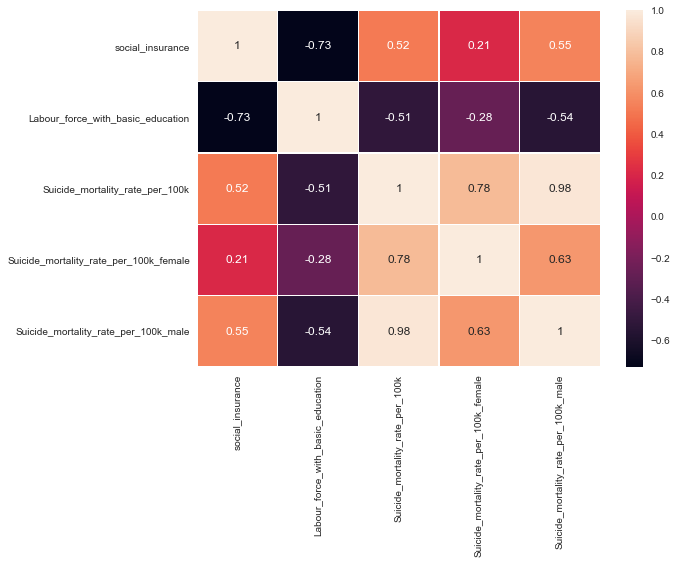

In [1038]:
# Before we doing the ML we tried to see If there is any coorelation between factors on "Suicide_mortality_rate_per_100k" 
indicator_corr= pd.get_dummies(indicator_cleandata).corr()
indicator_corr_treatment= indicator_corr["Suicide_mortality_rate_per_100k"]

print("Display items with correlation coefficient of 0.3 or more and -0.3 or less")
# Get values with a correlation coefficient of 0.2 or more and -0.2 or less
target_cc_value = 0.4

print("Positive correlation")
display(indicator_corr_treatment[indicator_corr_treatment >= target_cc_value])
print("Negative correlation")
display(indicator_corr_treatment[indicator_corr_treatment <= (-1*target_cc_value)])

df_indexs = indicator_corr[(indicator_corr["Suicide_mortality_rate_per_100k"] >= target_cc_value) | (indicator_corr["Suicide_mortality_rate_per_100k"] <= (-1 * target_cc_value))].index

#print(indicator_corr)
df_cc_target=indicator_corr.loc[df_indexs,df_indexs]
plt.figure(figsize=(10, 8)) #heatmap size
sns.heatmap(df_cc_target, annot=True, linewidths=.5)
plt.savefig("static/images/corr.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

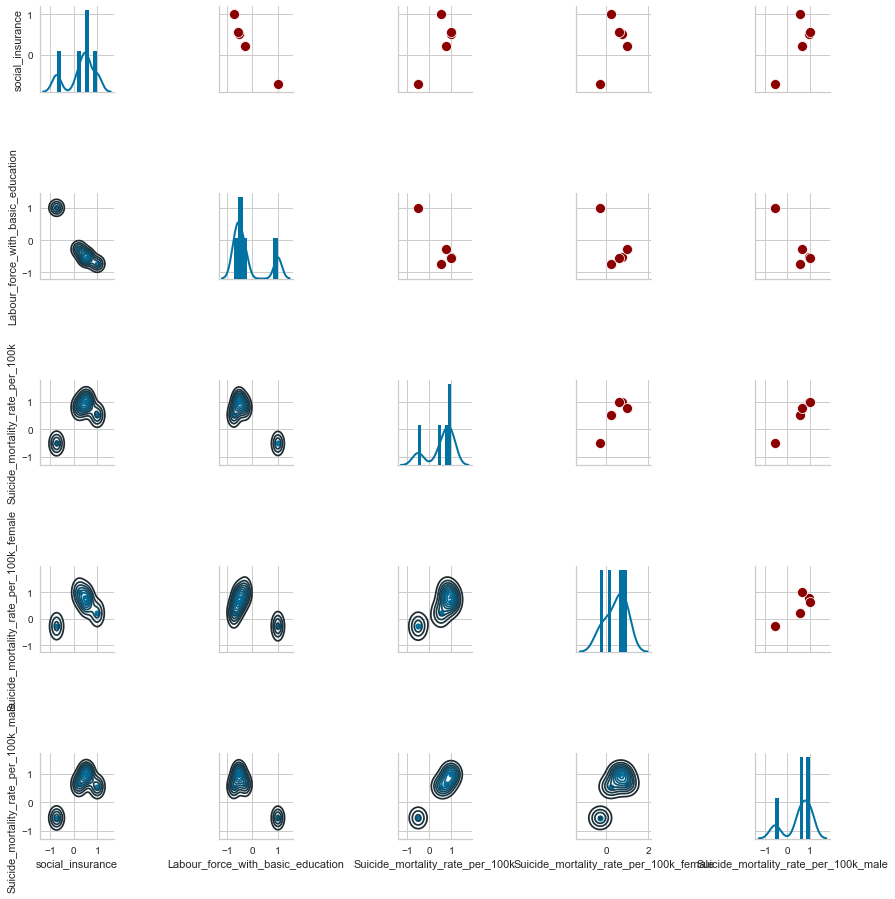

In [1039]:
g = sns.pairplot(df_cc_target)
g.map_upper(sns.scatterplot, s=100,color = 'darkred')
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.savefig("static/images/corrmatt.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

# 3. Machine Learning Analysis

In [1040]:
# prepare the data
ready_data=indicator_cleandata.drop("Year",axis=1)
df = ready_data.groupby(['Country']).mean()
clean=df.dropna().reset_index()
clean.head()

Series Name,Country,social_insurance,social_protection,unemployment_benefits,Female_employment,Male_employment,Labor_force_rate_female,Labor_force_rate_male,Labor_force_total,Labour_force_with_basic_education,Labour_force_with_basic_education_female,life_expectancy_female,Life_expectancy_total,Total_population,Suicide_mortality_rate_per_100k,Suicide_mortality_rate_per_100k_female,Suicide_mortality_rate_per_100k_male,unemployment_with_basic_education_total,Unemployment_with_basic_education_female,Unemployment_with_basic_education_male
0,Albania,41.096936,61.306452,10.132416,40.581079,55.584757,42.191883,58.822420,50.342830,45.807854,38.922623,73.844085,71.563441,2.708297e+06,6.46,4.88,8.02,11.840331,10.500746,12.950308
1,Argentina,29.696534,42.901479,0.951552,39.046175,64.342229,40.683966,75.014531,57.172521,51.380139,35.616492,74.472983,71.031729,3.230120e+07,9.04,3.56,14.78,11.624067,13.626500,10.545540
2,Armenia,52.777384,65.270131,3.592037,39.940654,55.696192,49.857543,67.088551,57.659765,35.050225,26.788200,73.626424,70.604831,2.912377e+06,5.46,2.24,9.06,17.039125,13.007517,19.173558
3,Bangladesh,1.365637,24.248428,4.320003,36.217546,88.275061,30.461775,86.476388,59.068462,61.267900,36.667320,58.481915,58.323525,1.036261e+08,6.28,7.76,4.78,3.340320,5.426740,2.472680
4,Belize,28.189539,39.387019,5.721098,37.650920,73.936151,37.443678,73.280892,55.108950,58.037650,38.244650,71.126458,68.946746,2.076720e+05,4.96,1.82,8.16,9.716186,16.777500,6.184928


# 3A. Linear regression

In [1041]:
y = clean["Suicide_mortality_rate_per_100k"].values
data = clean.drop("Country",axis=1).drop("Suicide_mortality_rate_per_100k",axis=1).drop("Suicide_mortality_rate_per_100k_female",axis=1).drop("Suicide_mortality_rate_per_100k_male",axis=1).drop("Total_population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns



Index(['social_protection', 'unemployment_benefits', 'Female_employment',
       'Male_employment', 'Labor_force_rate_female', 'Labor_force_rate_male',
       'Labor_force_total', 'Labour_force_with_basic_education',
       'Labour_force_with_basic_education_female', 'life_expectancy_female',
       'Life_expectancy_total', 'unemployment_with_basic_education_total',
       'Unemployment_with_basic_education_female',
       'Unemployment_with_basic_education_male'],
      dtype='object', name='Series Name')

In [1042]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1043]:
print(model.coef_)

[[-0.05836925  0.08092829 -0.22247886  1.07433485 -0.48574548 -0.42148772
  -0.32681834  0.36360786  0.69079098 -1.01135106  3.56158427 -3.80398602
   0.67729602  0.17960162 -0.80668075]]


In [1044]:
print(model.intercept_)

[24.73120899]


In [1045]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7025286422232244
Testing Score: -0.3568799829241276


Text(0.5, 1.0, 'Residual Plot')

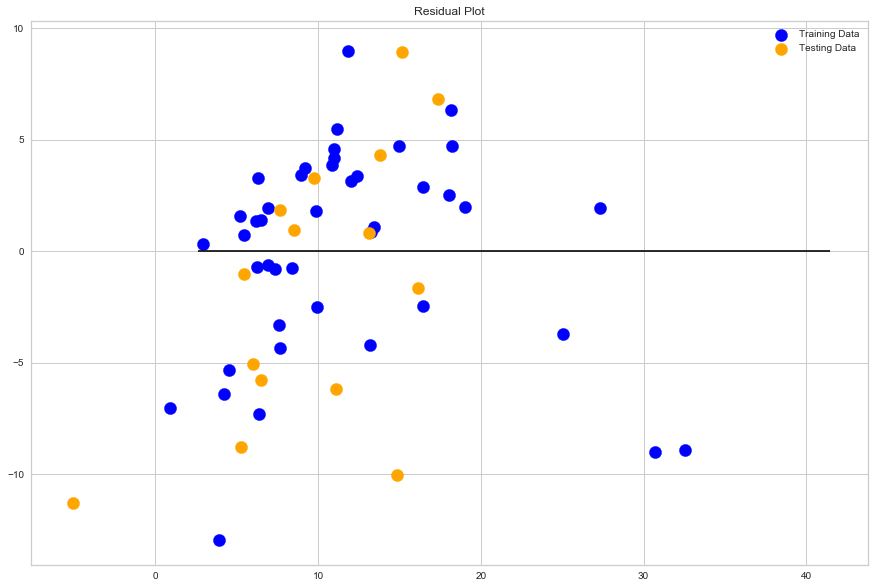

In [1046]:
plt.figure(figsize=(15, 10))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue",s=150, label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange",s=150, label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [1047]:
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 37.893265250272826, R2: -0.3568799829241276, MAE: 5.121917851431638


Feature: 0, Score: -0.05837
Feature: 1, Score: 0.08093
Feature: 2, Score: -0.22248
Feature: 3, Score: 1.07433
Feature: 4, Score: -0.48575
Feature: 5, Score: -0.42149
Feature: 6, Score: -0.32682
Feature: 7, Score: 0.36361
Feature: 8, Score: 0.69079
Feature: 9, Score: -1.01135
Feature: 10, Score: 3.56158
Feature: 11, Score: -3.80399
Feature: 12, Score: 0.67730
Feature: 13, Score: 0.17960
Feature: 14, Score: -0.80668


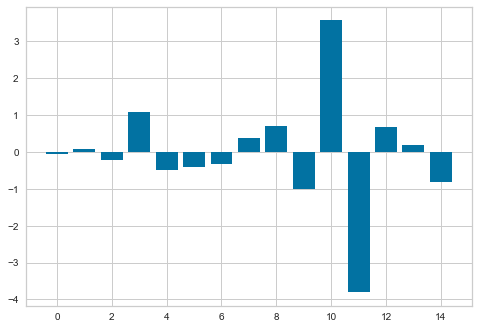

In [1048]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# 3B. Decision Tree Regression

In [1049]:
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
model=DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [1050]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: -2.1194058440095116


In [1051]:
y_pred=model.predict(X_test)

In [1052]:
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 87.11490666666664, R2: -2.1194058440095116, MAE: 6.041333333333332


# 3C. Support Vector Regression (SVR)

In [1053]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [1054]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [1055]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1805469504112408
Testing Score: 0.13443139523155279


In [1056]:
y_pred=regressor.predict(X_test)

In [1057]:
predictions = regressor.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = regressor.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 90.97312614237849, R2: 0.13443139523155279, MAE: 6.234672625721537


In [1058]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.853


# 3D. Logistic Regression

For our logistic regression model we group our dependent variable ("Suicide_mortality_rate_per_100k") in two group below and above the mean the mean value( 11.5) of Suicide mortality rate per 100,000 at the national level. Suicide mortality rate above 11.5 would be high and below 11.5 would be low.

In [1099]:
data = clean.drop("Country",axis=1).drop("Suicide_mortality_rate_per_100k",axis=1).drop("Suicide_mortality_rate_per_100k_female",axis=1).drop("Suicide_mortality_rate_per_100k_male",axis=1).drop("Total_population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns
y = clean["Suicide_mortality_rate_per_100k"]
def score(i):
    if i < 11.5: return "Low"
    if i > 11.5: return "High"
li = map(lambda x: "{1}".format(x, score(x)), y)
y2=[]
for i in li:
    y2.append(i)


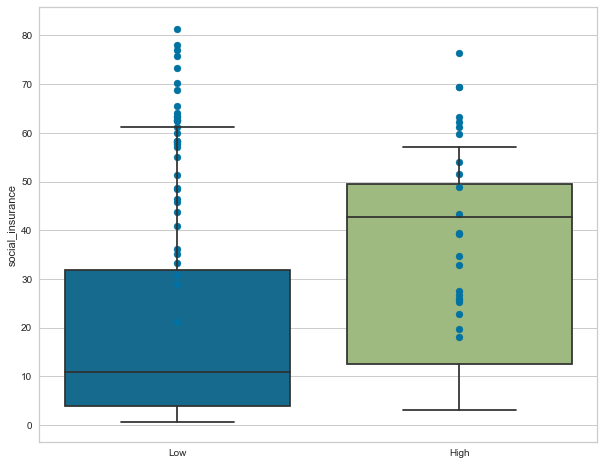

In [1100]:
plt.figure(figsize=(10, 8))
sns.boxplot(y2,clean['social_insurance'])
plt.scatter(y2,clean['Labour_force_with_basic_education'])

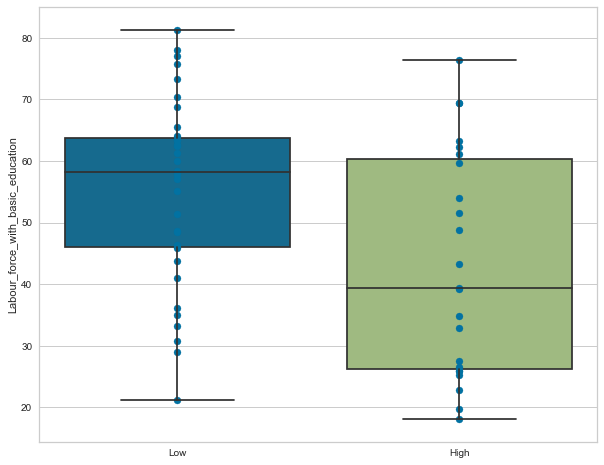

In [1101]:
plt.figure(figsize=(10, 8))
sns.boxplot(y2,clean['Labour_force_with_basic_education'])
plt.scatter(y2,clean['Labour_force_with_basic_education'])

In [1102]:
norm=pd.get_dummies(y2, drop_first = False)
norm_y=norm["High"]
norm_y=pd.DataFrame(norm_y)

In [1103]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [1104]:
model = LogisticRegression()

In [1105]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1106]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8
Testing Data Score: 0.4444444444444444


In [1107]:
predictions = model.predict(X_test)

In [1108]:
### Accuracy
accuracy = accuracy_score(y_test, predictions)
### Recall
recall = recall_score(y_test, predictions)
### Precision
precision = precision_score(y_test, predictions)
### F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：44.44%
Recall：14.29%
Precision：20.00%
F1：16.67%


In [1109]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.20      0.14      0.17         7

    accuracy                           0.44        18
   macro avg       0.37      0.39      0.38        18
weighted avg       0.41      0.44      0.42        18



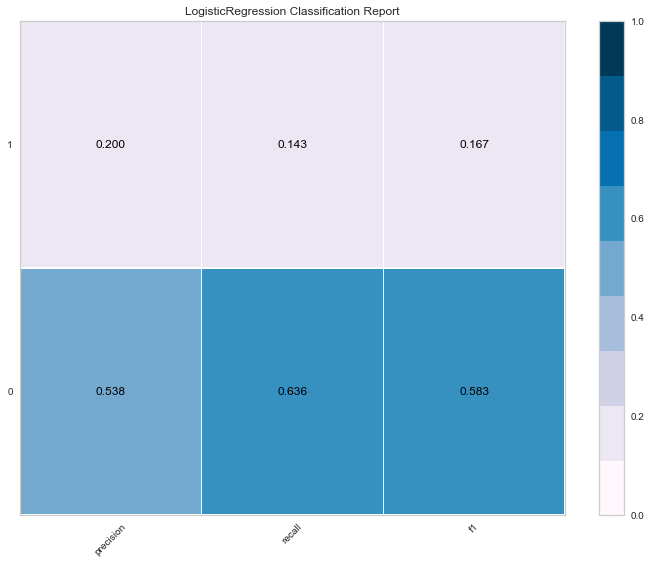

In [1110]:
plt.figure(figsize=(10,8))
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
viz.show(outpath="image/logisticregression_classifier.png")

Feature: 0, Score: -0.02389
Feature: 1, Score: 0.08450
Feature: 2, Score: -0.05189
Feature: 3, Score: 0.50660
Feature: 4, Score: -0.31817
Feature: 5, Score: -0.19441
Feature: 6, Score: 0.13714
Feature: 7, Score: 0.03137
Feature: 8, Score: 0.25548
Feature: 9, Score: -0.35428
Feature: 10, Score: 0.09690
Feature: 11, Score: -0.24442
Feature: 12, Score: 0.21487
Feature: 13, Score: 0.08479
Feature: 14, Score: -0.18059


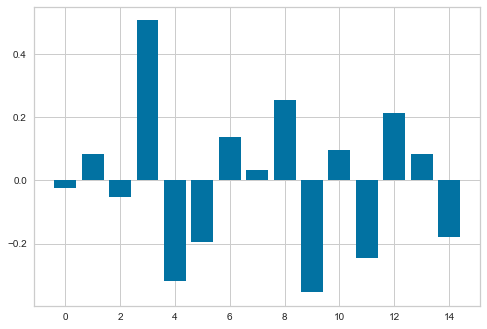

In [1111]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [1112]:
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [1113]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.875, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=5, penalty=l2, score=0.375, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.250, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [1114]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.575


In [1115]:
# Training score:
grid.score(X_train, y_train)

0.8

In [1119]:
# Testing score:
grid.score(X_test, y_test)

0.4444444444444444

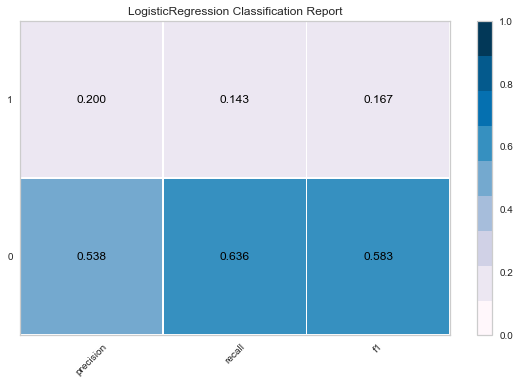

In [1120]:
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
viz.show(outpath="image/logisticregression_classifier.png")

# 3E. Support Vector Machine 

In [1072]:
X_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

In [1073]:
model = SVC(kernel='linear')
model.fit(X_train_minmax, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1074]:
print(f"Training Data Score: {model.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {model.score(X_test_minmax, y_test)}")

Training Data Score: 0.775
Testing Data Score: 0.7222222222222222


In [1075]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [1076]:
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.625, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.375, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.875, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=5, gamma=0.005, score=0.875, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.750, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.375, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.625, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] .................... C=5, gamma=0.005, score=0.750, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [1077]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7


In [1078]:
# Training score:
grid.score(X_train_minmax, y_train)

0.775

In [1079]:
# Testing score:
grid.score(X_test_minmax, y_test)

0.7222222222222222

In [1080]:
### Accuracy
accuracy = accuracy_score(y_test, predictions)
### Recall
recall = recall_score(y_test, predictions)
### Precision
precision = precision_score(y_test, predictions)
### F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：44.44%
Recall：14.29%
Precision：20.00%
F1：16.67%


In [1081]:
# Print Classification Report.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.20      0.14      0.17         7

    accuracy                           0.44        18
   macro avg       0.37      0.39      0.38        18
weighted avg       0.41      0.44      0.42        18



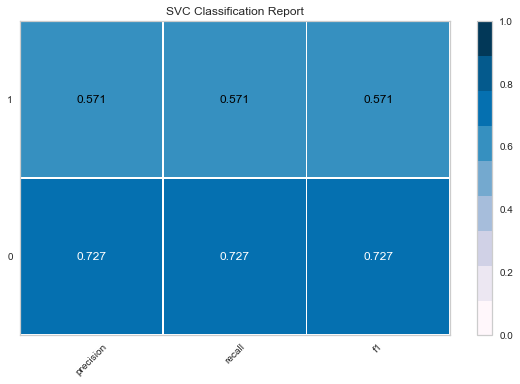

In [1082]:
viz = ClassificationReport(SVC(),cmap="PuBu")
viz.fit(X_train_minmax, y_train)
viz.score(X_test_minmax, y_test)
viz.finalize()
viz.show(outpath="image/svm_classifier.png")

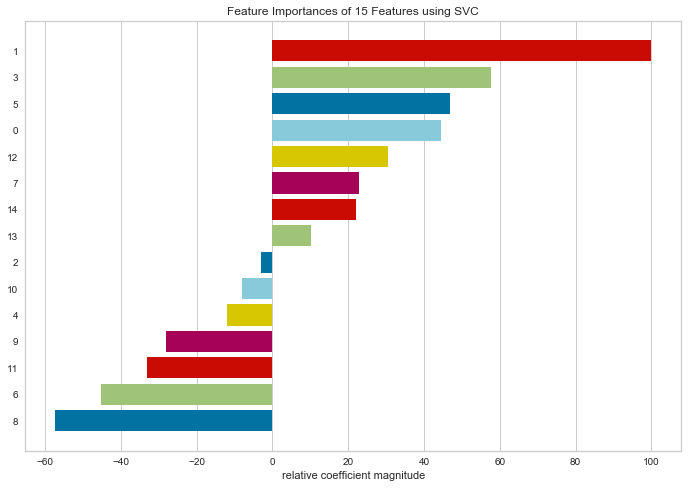

In [1083]:
viz = FeatureImportances(model,size=(700, 500),color='b', align='center')
viz.fit(X_train_minmax, y_train)
viz.show(outpath="image/svm_featureimportance.png")

# 3F. Decision tree

In [1092]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=1234)
clf = clf.fit(X_train, y_train)
print("train score=", clf.score(X_train, y_train))
print("test score=", clf.score(X_test, y_test))

train score= 0.975
test score= 0.6111111111111112


Feature: 0, Score: 0.67437
Feature: 1, Score: 1.52001
Feature: 2, Score: -0.04673
Feature: 3, Score: 0.87626
Feature: 4, Score: -0.18037
Feature: 5, Score: 0.71325
Feature: 6, Score: -0.68802
Feature: 7, Score: 0.34621
Feature: 8, Score: -0.87089
Feature: 9, Score: -0.42585
Feature: 10, Score: -0.12280
Feature: 11, Score: -0.50481
Feature: 12, Score: 0.46501
Feature: 13, Score: 0.15293
Feature: 14, Score: 0.33613


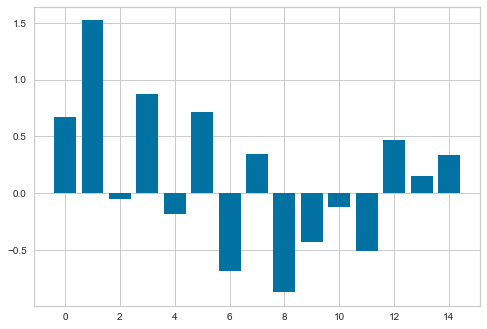

In [1093]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[Text(223.2, 277.62428571428575, 'X[1] <= 70.157\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(111.6, 234.91285714285715, 'X[6] <= 62.895\ngini = 0.358\nsamples = 30\nvalue = [23, 7]'),
 Text(55.8, 192.20142857142858, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(167.39999999999998, 192.20142857142858, 'X[6] <= 78.536\ngini = 0.293\nsamples = 28\nvalue = [23, 5]'),
 Text(111.6, 149.49, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(223.2, 149.49, 'X[14] <= 4.716\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(167.39999999999998, 106.77857142857141, 'X[8] <= 62.398\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(111.6, 64.06714285714284, 'X[1] <= 48.017\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(55.8, 21.35571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(167.39999999999998, 21.35571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(223.2, 64.06714285714284, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(279.0, 106.77857142857

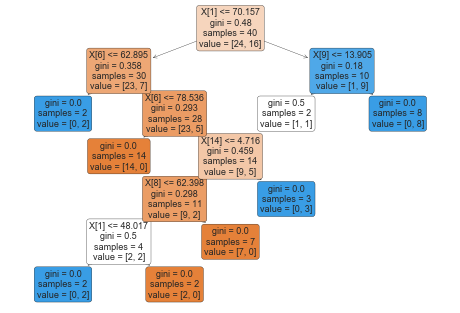

In [1097]:
tree.plot_tree(clf,
               filled=True, 
               rounded=True,
               fontsize=9) 



 # 3E. Random Forest

In [955]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [956]:
X_scaler = MinMaxScaler().fit(X_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [957]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [958]:
print(f"Training Data Score: {randomforest.score(X_train, y_train)}")
print(f"Testing Data Score: {randomforest.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6666666666666666


In [959]:
sorted(zip(randomforest.feature_importances_, x_columns), reverse=True)

[(0.15143981161591166, 'unemployment_benefits'),
 (0.10272462026625849, 'social_protection'),
 (0.08077666829050269, 'Labour_force_with_basic_education_female'),
 (0.07090306054728551, 'Labor_force_rate_female'),
 (0.0675554118677962, 'Life_expectancy_total'),
 (0.05768760774422443, 'Labor_force_total'),
 (0.05676150566504931, 'Unemployment_with_basic_education_female'),
 (0.055502172736488664, 'Unemployment_with_basic_education_male'),
 (0.05499465890931106, 'life_expectancy_female'),
 (0.05011524955758499, 'unemployment_with_basic_education_total'),
 (0.04996062163453842, 'Labor_force_rate_male'),
 (0.04578468125783333, 'Male_employment'),
 (0.04228089570116822, 'Female_employment'),
 (0.03935247003388772, 'Labour_force_with_basic_education')]

In [960]:
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(randomforest, param_grid, verbose=3)

In [961]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=125, n_estimators=250, score=0.625, total=   0.5s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.625, total=   0.4s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.375, total=   0.5s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.750, total=   0.5s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.625, total=   0.5s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.750, total=   0.5s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.625, total=   0.5s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.375, total=   0.5s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.625, total=   0.5s
[CV] max_depth=125, n_estimators=300 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   45.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [962]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test)

In [963]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.60      0.43      0.50         7

    accuracy                           0.67        18
   macro avg       0.65      0.62      0.62        18
weighted avg       0.66      0.67      0.65        18



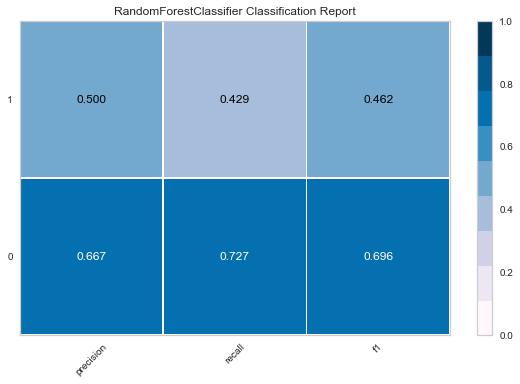

In [964]:
viz = ClassificationReport(RandomForestClassifier(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
viz.show(outpath="image/randomforest_classifier.png")

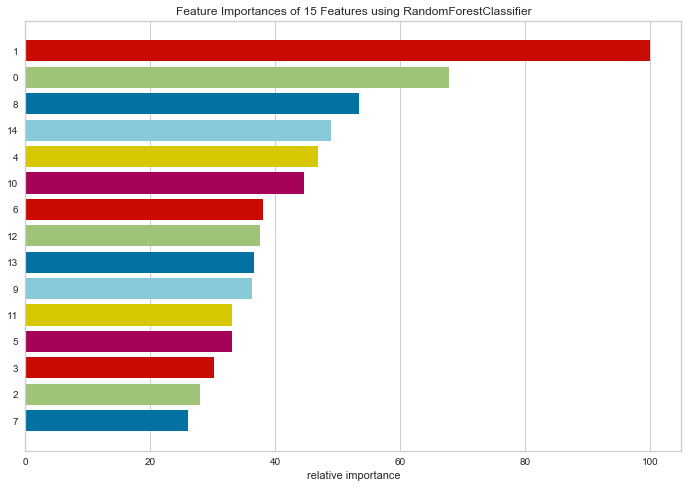

In [965]:
viz = FeatureImportances(randomforest,size=(700, 500),color='b', align='center')
viz.fit(X_train, y_train)
viz.show(outpath="image/rf_featureimportance.png")

# 4. Conclusion

In this project we used various machine learning models, trained and tested the data to see the models ability to predict suicide mortality rate from various macro socio-economic factors in the national level. We used the linear regression, logistic regression,support Vector Machine, decision tree, and random forest model. We note differences in accuracy (and thus, effectiveness), the models has toward the entire dataset. We noticed similar reapearing patterns that we knew would serve of importance when predicting suicide mortality rate from various macro socio-economic factors.

The first step in our analysis was to clean, and preprocess our dataset to make ready for machine learning analysis. We cleaned, explored and visualized the data. The pre-processing normalize the data for ML analysis.

Before the ML analysis we tried to see If there is any coorelation between factors on Suicide mortality rate per 100,000 people. We have found a strong positive (0.5) correlation between Suicide mortality rate, and people seeking of social protection, and labor programs (% of population).

Previous research identified that there is a solid association between economic strain and suicide, little attention has been paid to how specific welfare policies that are designed to alleviate economic strain may influence suicide rates. There is a growing body of research that is using an institutional approach to demonstrate the role of welfare-state policies in the distribution of health. However, this perspective has not been applied yet to the investigation of suicide.(Simone Rambotti 2019) 

We have found also a strong negative(-0.5) correlation between Suicide mortality rate (% of population) and Coverage of Labor force with basic education (% of total working-age population with basic education). When Countries having a population at least with basic education is higher negatively relate with Suicide mortality rate. Which means when the poulation education distribution increases Suicide mortality rate decreases. 







